# OpenStreetMap

* **Products used:**
[OpenStreetMap](https://www.openstreetmap.org/)

*This dataset is external to the Digital Earth Africa platform.*

## Background

[OpenStreetMap](https://www.openstreetmap.org/) is a free and open geographic database, providing location information of roads, buildings, and landmarks. 
It is built, maintained and supported by a world-wide geospatial community.

OpenStreetMap data is licensed under the [Open Data Commons Open Database License (ODbL)](https://opendatacommons.org/licenses/odbl/) by the OpenStreetMap Foundation (OSMF). It is free to copy, distribute, transmit and adapt the data, providing credit to OpenStreetMap and its contributors. Full licence information and attribution guidelines can be found at the [OpenStreetMap's Copyright and License page](https://www.openstreetmap.org/copyright).

## Description

This notebook will demonstrate how to access OpenStreetMap data using Python package [`osmnx`](https://osmnx.readthedocs.io/en/stable/osmnx.html). 

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import osmnx as ox
import geopandas as gpd

By default, `osmnx` will cache the query response so it doesn't have to call the API repeatedly for the same request.
Accessing the cache is efficient when refining an analysis or when a user's main area of interest if fixed. 
The users should, however, be aware that the cached files will take up storage space. 

Whether to use the cache and where to store the cached data can be configured.
In this example, we will set the cache to be stored in a temporary folder that is cleared when a user logs out of the Sandbox.
This may not be necessary for some users.

In [2]:
ox.settings.cache_folder='/tmp/cache/'

### Analysis parameters

This section defines the analysis parameters, including:

* `central_lat, central_lon, buffer`: center lat/lon and analysis window size for the area of interest

The default location is in Johannesburg, South Africa.

The OpenStreetMap API provides a few different ways to define location. 
While methods using address or place name are convenient to use, they depend on geocoding and are more likely to yield ambiguous location matches. 
If place name is used, the `osmnx.geocode_to_gdf()` function can be used to check whether a location name yields the correct place boundary.
For combined analysis with DEAfrica datasets, query using bounding box or polygon is preferred.

When using bounding box to query, note the order of bounds are "north, south, east, west".

In [3]:
# Set the central latitude and longitude.
central_lat = -26.2041
central_lon = 28.0473

# Set the buffer to load around the central coordinates.
buffer = 0.05

# Compute the bounding box for the study area. 
xmin, xmax = central_lon - buffer, central_lon + buffer
ymin, ymax = central_lat - buffer, central_lat + buffer

bbox = (xmin, ymin, xmax, ymax)

## Retrieve building geometries from OpenStreetMap

Different types of geometries can be queried by defining the `tags` parameter.
For example, `tags={'building': True}` would return all building footprints in the area. 

Using the location and tags, geometries will be retrieved from OpenStreetMap and the results are returned as a Geopandas GeoDataFrame.

In [4]:
# tags for buildings
tags = {'building': True}

In [5]:
geometries = ox.features.features_from_bbox(bbox=bbox, tags=tags)

In [6]:
#print the first few rows
geometries.head()

geometry  \
element  id                                                              
node     618018755                          POINT (28.00625 -26.21595)   
         739768208                          POINT (28.04897 -26.17096)   
         3656191305                         POINT (28.00091 -26.18852)   
relation 952160      POLYGON ((28.05994 -26.19668, 28.06013 -26.196...   
         2609571     POLYGON ((28.05811 -26.18412, 28.05811 -26.184...   

                        building                        name      addr:city  \
element  id                                                                   
node     618018755        public  Langlaagte Testing Grounds            NaN   
         739768208        public  Astotech Conference Centre            NaN   
         3656191305  residential  Society of Jesus (Jesuits)  Auckland Park   
relation 952160          stadium                         NaN            NaN   
         2609571             yes                         NaN            NaN   

                    addr:housenumber addr:postcode     addr:street  \
element  id                                                          
node     618018755               NaN           NaN             NaN   
         739768208               NaN           NaN             NaN   
         3656191305               15          2092  Molesey Avenue   
relation 952160                  NaN           NaN             NaN   
         2609571                 NaN           NaN             NaN   

                    building:levels            phone             website  ...  \
element  id                                                               ...   
node     618018755              NaN              NaN                 NaN  ...   
         739768208              NaN              NaN                 NaN  ...   
         3656191305               1  +27 11 482 4237  https://sj.org.za/  ...   
relation 952160                 NaN              NaN                 NaN  ...   
         2609571                NaN              NaN                 NaN  ...   

                    service_times noexit capacity end_year house bench  bin  \
element  id                                                                   
node     618018755            NaN    NaN      NaN      NaN   NaN   NaN  NaN   
         739768208            NaN    NaN      NaN      NaN   NaN   NaN  NaN   
         3656191305           NaN    NaN      NaN      NaN   NaN   NaN  NaN   
relation 952160               NaN    NaN      NaN      NaN   NaN   NaN  NaN   
         2609571              NaN    NaN      NaN      NaN   NaN   NaN  NaN   

                     lit          type operator:short  
element  id                                            
node     618018755   NaN           NaN            NaN  
         739768208   NaN           NaN            NaN  
         3656191305  NaN           NaN            NaN  
relation 952160      NaN  multipolygon            NaN  
         2609571     NaN  multipolygon            NaN  

[5 rows x 146 columns]

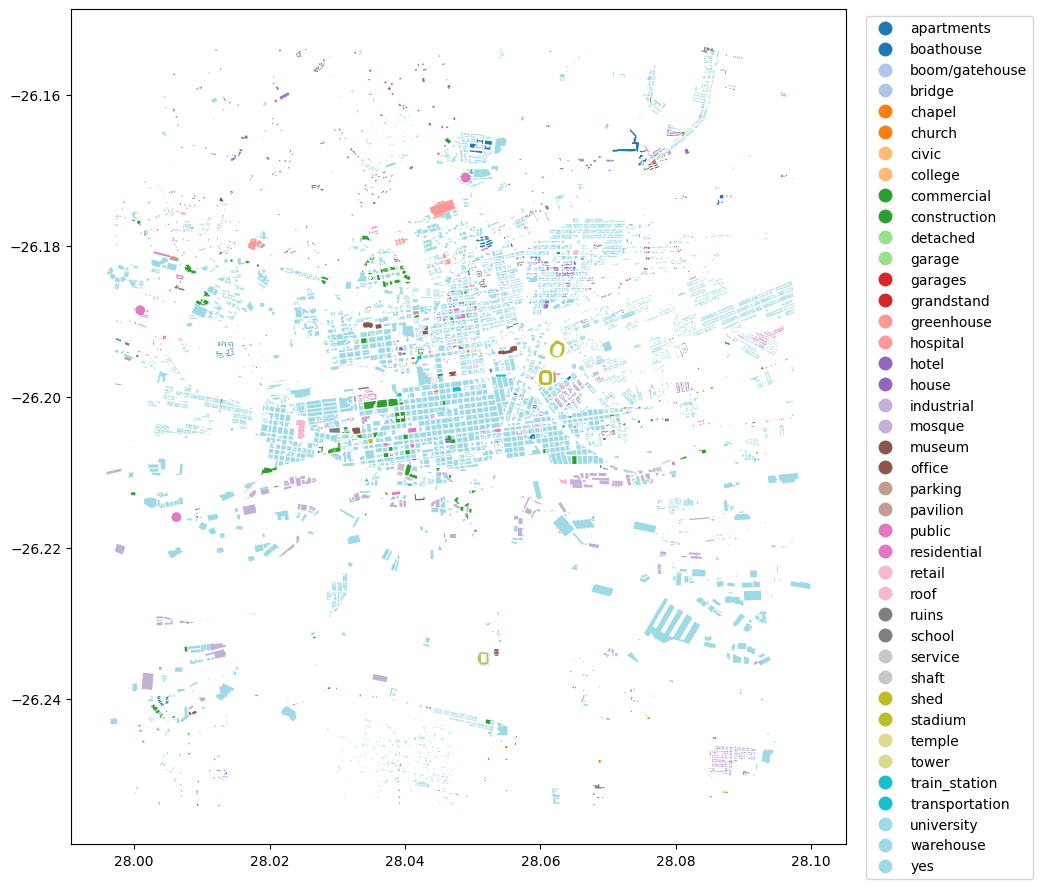

In [7]:
#visualize the geometries retrieved
geometries.plot(figsize=(10,12), cmap='tab20', column='building', legend=True, legend_kwds={'bbox_to_anchor':(1.25,1)});

## Retrieve road geometries from OpenStreetMap

Road networks can be retrieved using the `highway` tag.
A list of tag values can be used to select specific types of geometries.

Tag values for `highway` and their descriptions can be found at https://wiki.openstreetmap.org/wiki/OpenStreetMap_Carto/Lines

In [8]:
# selected types of roads
tags = {'highway': ['motorway', 'motorway_link', 'primary', 'primary_link',
                    'secondary', 'secondary_link', 'tertiary', 'tertiary_link', 
                    'residential', 'pedestrian']}

In [9]:
#noting the order of the bounds provided
geometries = ox.features.features_from_bbox(bbox=bbox, tags=tags)

In [10]:
#print the first few rows
geometries.head()

geometry  highway  \
element id                                                                    
way     4334924  LINESTRING (28.05643 -26.20387, 28.05627 -26.2...  primary   
        4339731  LINESTRING (28.01733 -26.21239, 28.01707 -26.2...  primary   
        4339842  LINESTRING (28.08513 -26.19127, 28.08585 -26.1...  primary   
        4339844  LINESTRING (28.05802 -26.20314, 28.05774 -26.2...  primary   
        4339876  LINESTRING (28.01748 -26.2122, 28.01759 -26.21...  primary   

                 ref junction:ref crossing                   name direction  \
element id                                                                    
way     4334924  R24          NaN      NaN    Commissioner Street       NaN   
        4339731  R41          NaN      NaN         Main Reef Road       NaN   
        4339842  R24          NaN      NaN       Kitchener Avenue       NaN   
        4339844  R24          NaN      NaN  Albertina Sisulu Road       NaN   
        4339876  R41          NaN      NaN         Main Reef Road       NaN   

                destination:ref:to bicycle name:en  ... minspeed  \
element id                                          ...            
way     4334924                NaN     NaN     NaN  ...      NaN   
        4339731                NaN     NaN     NaN  ...      NaN   
        4339842                NaN     NaN     NaN  ...      NaN   
        4339844                NaN     NaN     NaN  ...      NaN   
        4339876                NaN     NaN     NaN  ...      NaN   

                maxspeed:forward cycleway:left bridge:ref area cycleway:right  \
element id                                                                      
way     4334924              NaN           NaN        NaN  NaN            NaN   
        4339731              NaN           NaN        NaN  NaN            NaN   
        4339842              NaN           NaN        NaN  NaN            NaN   
        4339844              NaN           NaN        NaN  NaN            NaN   
        4339876              NaN           NaN        NaN  NaN            NaN   

                bus:lanes:backward covered handrail placement  
element id                                                     
way     4334924                NaN     NaN      NaN       NaN  
        4339731                NaN     NaN      NaN       NaN  
        4339842                NaN     NaN      NaN       NaN  
        4339844                NaN     NaN      NaN       NaN  
        4339876                NaN     NaN      NaN       NaN  

[5 rows x 71 columns]

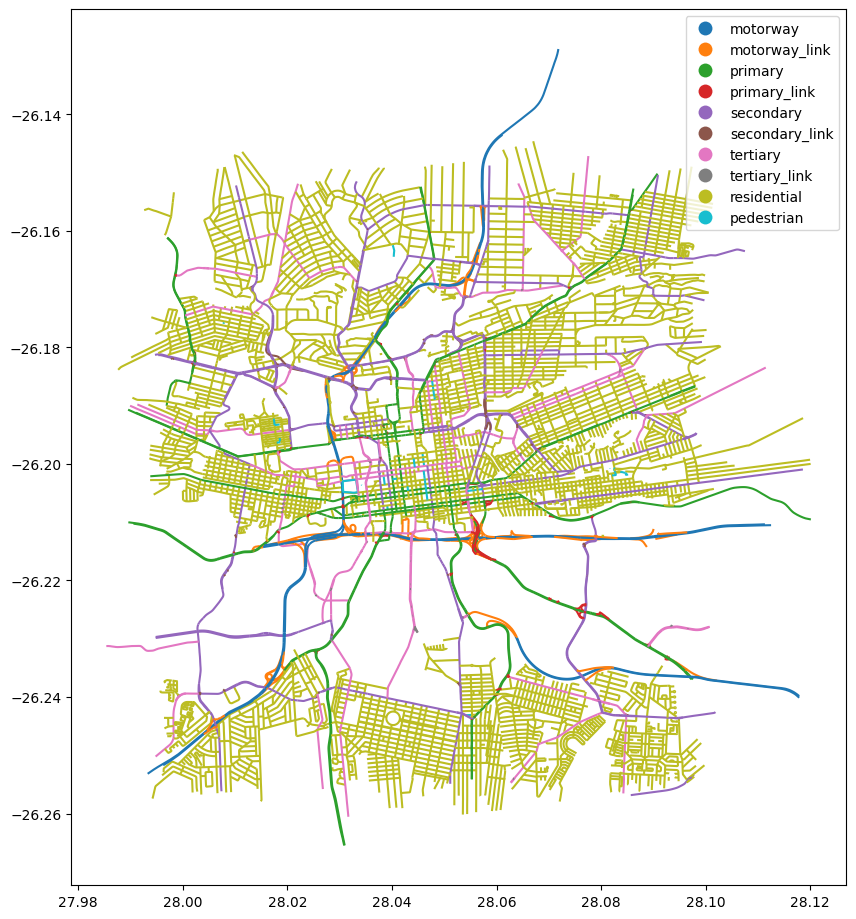

In [11]:
#visualize the geometries retrieved
geometries.plot(figsize=(10,12), cmap='tab10', column='highway', categorical=True, categories=tags['highway'], legend=True);

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

This notebook accesses OpenStreetMap data, therefore when sharing analysis results, attribution should follow guidellines from the [OpenStreetMap's Copyright and License page](https://www.openstreetmap.org/copyright).

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [12]:
import datacube
print(datacube.__version__)

1.8.20


**Last Tested:**

In [13]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-01-13'